In [54]:
import pandas as pd
# Load the dataset
file_path = 'training.1600000.processed.noemoticon.csv'
column_names = ['sentiment', 'id', 'date', 'query', 'user', 'text']
try:
    df = pd.read_csv(file_path, header=None, encoding='latin1', names=column_names)
except FileNotFoundError:
    print("Dataset file not found.")
    exit()
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()


/var/folders/c6/kh1v5smn18l3tbcsjpvvqv1h0000gn/T/ipykernel_684/3333451271.py:6: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, encoding='latin1', names=column_names)


In [55]:
# حذف ردیف با مقدار اشتباه
df = df[df['sentiment'].isin(['0', '4'])]

# تبدیل مقادیر رشته‌ای '0' و '4' به عدد صحیح 0 و 4
df['sentiment'] = df['sentiment'].replace('0', 0)
df['sentiment'] = df['sentiment'].replace('4', 4)

# تبدیل کل ستون 'sentiment' به نوع داده integer
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='raise')

/var/folders/c6/kh1v5smn18l3tbcsjpvvqv1h0000gn/T/ipykernel_684/3926364913.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment'] = df['sentiment'].replace('0', 0)


In [ ]:
# Convert text to lowercase
df['text_lower'] = df['text'].str.lower()
print("Sample DataFrame after converting to lowercase:")
print(df[['text', 'text_lower']].head())

In [57]:
import string
# Remove punctuation
punctuation = string.punctuation

def remove_punctuation(text):
    translator = str.maketrans('', '', punctuation)
    return text.translate(translator)

In [ ]:
df['text_without_punctuation'] = df['text_lower'].apply(remove_punctuation)
print("\nSample DataFrame after removing punctuation:")
print(df[['text_lower', 'text_without_punctuation']].head())

In [59]:
from sklearn.model_selection import train_test_split

# فرض کنید X ماتریس ویژگی TF-IDF و y ستون احساسات (sentiment) باشه
# اگر ستون احساسات شما اسم دیگه‌ای داره، اون رو جایگزین کنید
y = df['sentiment']

# تقسیم داده‌ها به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("شکل X_train:", X_train.shape)
print("شکل X_test:", X_test.shape)
print("شکل y_train:", y_train.shape)
print("شکل y_test:", y_test.shape)

شکل X_train: (104856, 114067)
شکل X_test: (26215, 114067)
شکل y_train: (104856,)
شکل y_test: (26215,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ایجاد یک شیء از TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# آموزش و تبدیل متن پیش‌پردازش شده به ماتریس ویژگی TF-IDF **روی متن بدون علائم نگارشی**
X = tfidf_vectorizer.fit_transform(df['text_without_punctuation'])

# حالا X شامل ماتریس ویژگی TF-IDF برای توییت‌های شماست
print("شکل ماتریس ویژگی TF-IDF:", X.shape)
print("تعداد ویژگی‌ها (اندازه واژگان):", len(tfidf_vectorizer.vocabulary_))
print("نمونه‌ای از ویژگی‌های تبدیل شده (به صورت sparse matrix):")
print(X[:5])

# برای اینکه بفهمیم هر ستون در ماتریس X مربوط به چه کلمه‌ای است:
feature_names = tfidf_vectorizer.get_feature_names_out()
print("\nنمونه‌ای از نام ویژگی‌ها (کلمات واژگان):", feature_names[:20])

In [61]:
from sklearn.naive_bayes import MultinomialNB

# ایجاد یک شیء از مدل MultinomialNB
naive_bayes_model = MultinomialNB()

# آموزش مدل با استفاده از داده‌های آموزشی
naive_bayes_model.fit(X_train, y_train)

print("مدل Naive Bayes با موفقیت آموزش داده شد.")

مدل Naive Bayes با موفقیت آموزش داده شد.


In [63]:
from sklearn.metrics import accuracy_score

# پیش‌بینی برچسب‌ها برای داده‌های آزمایشی
y_pred = naive_bayes_model.predict(X_test)

# محاسبه دقت مدل
accuracy = accuracy_score(y_test, y_pred)
print(f"دقت مدل Naive Bayes روی داده‌های آزمایشی: {accuracy:.4f}")

دقت مدل Naive Bayes روی داده‌های آزمایشی: 1.0000


دقت مدل Naive Bayes روی داده‌های آزمایشی: 1.0000


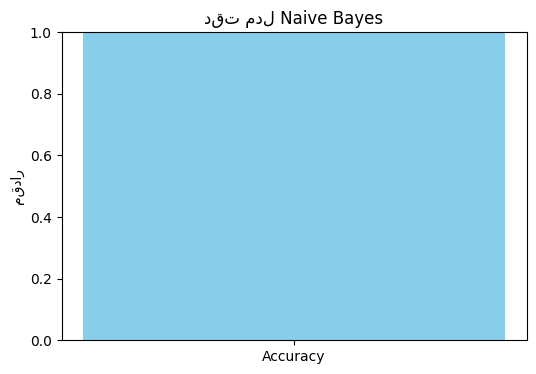

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# پیش‌بینی برچسب‌ها برای داده‌های آزمایشی
y_pred = naive_bayes_model.predict(X_test)

# محاسبه دقت مدل
accuracy = accuracy_score(y_test, y_pred)
print(f"دقت مدل Naive Bayes روی داده‌های آزمایشی: {accuracy:.4f}")

# ایجاد نمودار میله‌ای برای دقت
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.ylabel('مقدار')
plt.title('دقت مدل Naive Bayes')
plt.ylim(0, 1)  # محدوده محور y را بین 0 و 1 تنظیم می‌کنیم
plt.show()

In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26215

    accuracy                           1.00     26215
   macro avg       1.00      1.00      1.00     26215
weighted avg       1.00      1.00      1.00     26215

